In [2]:
import tensorflow as tf
import cv2
import numpy as np
import os
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the data
fldr = 'UTKFace'
flies = os.listdir(fldr)

ages = []
genders = []
images = []

for fle in flies:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle
    image = cv2.imread(total)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)
    ages.append(age)
    genders.append(gender)

images_f = np.array(images) / 255.0
ages_f = np.array(ages)
genders_f = np.array(genders)

labels = np.array([[ages[i], genders[i]] for i in range(len(ages))])

X_train, X_test, Y_train, Y_test = train_test_split(images_f, labels, test_size=0.25)
Y_train_2 = [Y_train[:, 1], Y_train[:, 0]]
Y_test_2 = [Y_test[:, 1], Y_test[:, 0]]

In [4]:
# Define the Convolutional Block
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

# Define the model
def create_model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="adam", metrics=["accuracy", "mae"])
    return model

# Create Model

In [5]:
model = create_model((48, 48, 3))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [6]:
# Set up callbacks
checkpoint = ModelCheckpoint('Age_Gender_Hair_Detection.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')
early_stop = EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True)
callback_list = [checkpoint, early_stop]


History = model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list, verbose=2)


Epoch 1/250

Epoch 1: val_loss improved from inf to 17.16218, saving model to Age_Gender_Hair_Detection.keras
278/278 - 62s - 222ms/step - age_out_mae: 15.6478 - loss: 16.5049 - sex_out_accuracy: 0.5983 - val_age_out_mae: 16.3777 - val_loss: 17.1622 - val_sex_out_accuracy: 0.6899
Epoch 2/250

Epoch 2: val_loss improved from 17.16218 to 16.68157, saving model to Age_Gender_Hair_Detection.keras
278/278 - 57s - 206ms/step - age_out_mae: 12.2110 - loss: 12.9998 - sex_out_accuracy: 0.7053 - val_age_out_mae: 15.8955 - val_loss: 16.6816 - val_sex_out_accuracy: 0.7476
Epoch 3/250

Epoch 3: val_loss improved from 16.68157 to 13.23568, saving model to Age_Gender_Hair_Detection.keras
278/278 - 54s - 195ms/step - age_out_mae: 10.0925 - loss: 10.8586 - sex_out_accuracy: 0.7539 - val_age_out_mae: 12.4914 - val_loss: 13.2357 - val_sex_out_accuracy: 0.7862
Epoch 4/250

Epoch 4: val_loss improved from 13.23568 to 12.06810, saving model to Age_Gender_Hair_Detection.keras
278/278 - 57s - 204ms/step - age

# Evaluate and Saving Model

In [7]:
# Evaluate the model
model.evaluate(X_test, Y_test_2)

# Save the trained model
model.save("final_model.h5")

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - age_out_mae: 6.4771 - loss: 7.5142 - sex_out_accuracy: 0.8843


# Plotting Model Accuracy

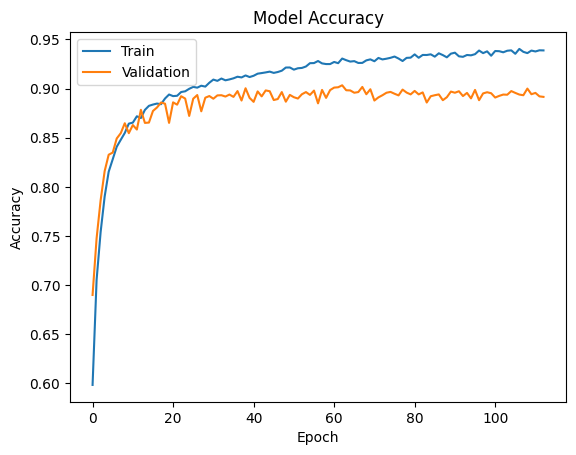

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3124
           1       0.89      0.88      0.88      2803

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927

[[2807  317]
 [ 348 2455]]


C:\Users\Aditya\AppData\Local\Temp\ipykernel_7224\399524246.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_genders = [int(np.round(p)) for p in predictions[0]]


In [9]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model predictions and classification report
predictions = model.predict(X_test)
predicted_genders = [int(np.round(p)) for p in predictions[0]]

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test_2[0], predicted_genders))
print(confusion_matrix(Y_test_2[0], predicted_genders))

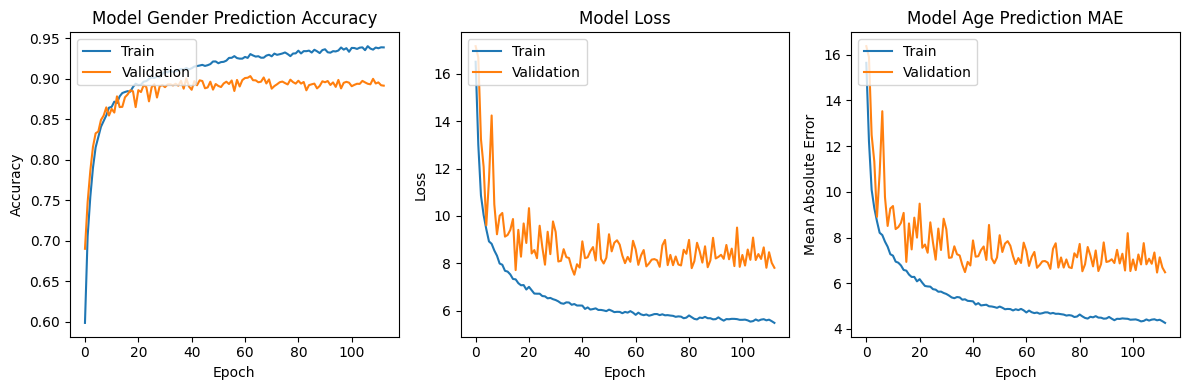

In [14]:

# Plot training & validation accuracy values for gender prediction
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Gender Prediction Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation MAE for age prediction
plt.subplot(1, 3, 3)
plt.plot(History.history['age_out_mae'])
plt.plot(History.history['val_age_out_mae'])
plt.title('Model Age Prediction MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
